In [122]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

In [123]:
# Load data from the pickle file
with open('data.pickle', 'rb') as f:
    X_fit, y_fit, X_test, y_test = pickle.load(f)

# 1. Default Models

## 1.1. Logistic Regression Default

In [124]:
# Define the logistic regression model
def logistic_regression_model(X_fit, y_fit, X_test, y_test):

    # Initialize logistic regression model with default parameters
    model = LogisticRegression()
    # Fit the model on the training data
    model.fit(X_fit, y_fit)
    
    # Predict on the testing data
    y_pred_lr = model.predict(X_test)


    # Calculate parameters on test data
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    recall_lr = recall_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr)
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)

    y_prob_lr = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_lr)  # Assign the third value to 
    roc_auc = auc(fpr, tpr)

    # Save the model metrics
    models = [('Logistic Regression Defult', accuracy_lr, recall_lr, precision_lr, f1_lr, roc_lr, roc_auc)]
    df_logistic_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    return y_pred_lr, df_logistic_metrics, plt



### Call the logistic regression model function

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Logistic Regression Defult,0.787396,0.25498,0.705882,0.374634,0.609807,0.6182


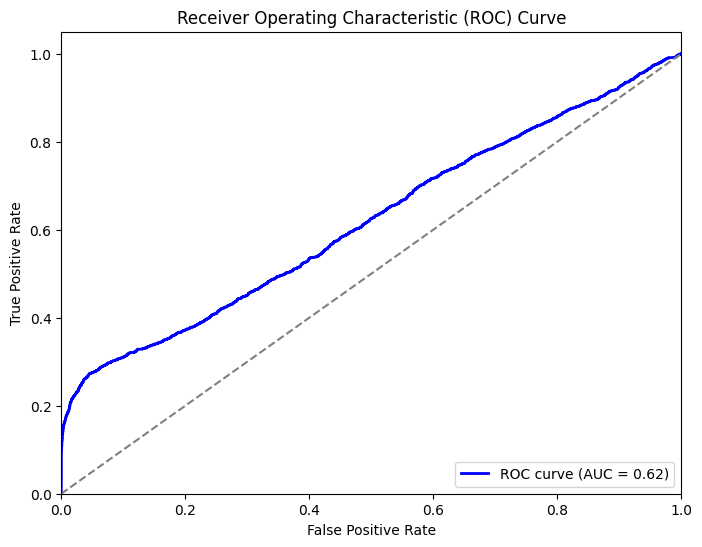

In [125]:
y_pred_lr, df_logistic_metrics, plt = logistic_regression_model(X_fit, y_fit, X_test, y_test)
df_logistic_metrics

## 1.2. Random Forest Default

In [126]:
# Define the random forest model
def random_forest_model(X_fit, y_fit, X_test, y_test):

    # Initialize random forest model with default parameters
    model = RandomForestClassifier()
    # Fit the model on the training data
    model.fit(X_fit, y_fit)
    
    # Predict on the testing data
    y_pred_rf = model.predict(X_test)

    # Calculate parameters on test data
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)

    # Calculate probabilities of the positive class for fpr tpr calculation
    y_prob_rf = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
    roc_auc = auc(fpr, tpr)

    # Save the model metrics
    models = [('Random Forest Defult', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf, roc_auc)]
    df_random_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    return y_pred_rf, df_random_metrics, plt, model

### Call the random forest model function

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Random Forest Defult,0.853952,0.626383,0.747886,0.681763,0.778046,0.904929


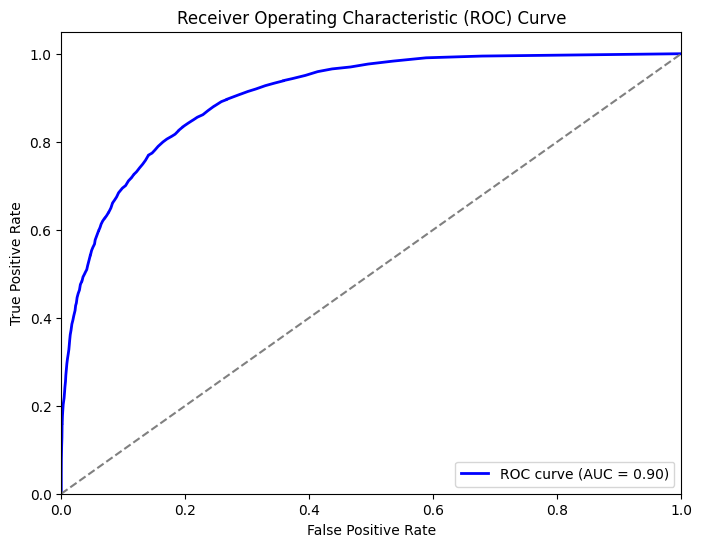

In [127]:
y_pred_rf, df_random_metrics, plt, rf_model = random_forest_model(X_fit, y_fit, X_test, y_test)
df_random_metrics

## 1.3. Compare Results

In [128]:
df_combined = pd.concat([df_logistic_metrics, df_random_metrics], axis=0)
df_combined

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Logistic Regression Defult,0.787396,0.254980,0.705882,0.374634,0.609807,0.618200
0,Random Forest Defult,0.853952,0.626383,0.747886,0.681763,0.778046,0.904929


# 2. Counterfactual Explanations

In [ ]:
generate_counterfactuals(df, n_samples, n_counterfactuals, model)

In [129]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36177 entries, 0 to 36176
Data columns (total 82 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        36177 non-null  int64  
 1   workclass                                  36177 non-null  int32  
 2   fnlwgt                                     36177 non-null  int64  
 3   education-num                              36177 non-null  int64  
 4   capital-gain                               36177 non-null  int64  
 5   capital-loss                               36177 non-null  int64  
 6   hours-per-week                             36177 non-null  int64  
 7   marital-status_Divorced                    36177 non-null  float64
 8   marital-status_Married-AF-spouse           36177 non-null  float64
 9   marital-status_Married-civ-spouse          36177 non-null  float64
 10  marital-status_Married

In [130]:
import dice_ml
from dice_ml.utils import helpers # helper functions
from sklearn.model_selection import train_test_split

In [154]:
sample = X_fit.sample(100, random_state=42)

In [155]:
sample['occupation_Handlers-cleaners'].value_counts()

0.0    95
1.0     5
Name: occupation_Handlers-cleaners, dtype: int64

In [157]:
# Initialize the data for the DICE model
diceSet = dice_ml.Data(dataframe=sample.assign(income=y_fit), continuous_features = ['age', 'workclass', 'fnlwgt','education-num','hours-per-week', 'capital-gain','capital-loss'], outcome_name='income')
## diceSet = dice_ml.Data(dataframe=sample.assign(income=y_fit), continuous_features = sample.columns.tolist(), outcome_name='income')

In [158]:
#This line initializes the model for DiCE. It creates a DiCE model object from the trained model and any computations or interactions with the model, such as predictions and model fitting, will be handled through scikit-learn's functionalities. any computations or interactions with the model, such as predictions and model fitting, will be handled through scikit-learn's functionalities..
m = dice_ml.Model(model= rf_model, backend="sklearn")
# pytorch, tensorflow, sklearn, linear_model, xgboost

In [159]:
# Initialize the DiCE model
exp = dice_ml.Dice(diceSet, m, method="random") # It involves randomly selecting values for the features while ensuring that these values lead to instances that are sufficiently different from the original instance to provide diverse explanations.

In [136]:
counterfactual_expl = exp.generate_counterfactuals(sample, total_CFs=5, desired_class="opposite") #This line generates counterfactual explanations for a specific test instance

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [02:45<00:00, 82.89s/it] 


In [137]:
counterfactual_expl.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,75,4,205860,10,0,1735,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,-,2.0,-,-,-,673.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,2.0,-,-,-,540.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,46.0,-,-,-,-,399.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
3,-,2.0,-,-,-,540.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,46.0,-,-,-,-,399.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39,2,86143,3,0,0,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,60.0,-,-,10.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,60.0,-,-,10.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
2,60.0,-,-,10.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
3,60.0,-,-,10.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
4,60.0,-,-,10.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


In [141]:
# feature importance, runned with the sample instance of 2
query_instance = sample
imp = exp.local_feature_importance(query_instance, total_CFs=10)
print(imp.local_importance)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [05:41<00:00, 170.87s/it]

[{'workclass': 1.0, 'capital-loss': 1.0, 'occupation_Craft-repair': 0.2, 'fnlwgt': 0.2, 'race_Asian-Pac-Islander': 0.1, 'marital-status_Divorced': 0.0, 'marital-status_Married-AF-spouse': 0.0, 'marital-status_Married-civ-spouse': 0.0, 'marital-status_Married-spouse-absent': 0.0, 'marital-status_Never-married': 0.0, 'marital-status_Separated': 0.0, 'marital-status_Widowed': 0.0, 'occupation_Adm-clerical': 0.0, 'occupation_Armed-Forces': 0.0, 'occupation_Exec-managerial': 0.0, 'occupation_Farming-fishing': 0.0, 'occupation_Handlers-cleaners': 0.0, 'occupation_Machine-op-inspct': 0.0, 'occupation_Other-service': 0.0, 'occupation_Priv-house-serv': 0.0, 'occupation_Prof-specialty': 0.0, 'occupation_Protective-serv': 0.0, 'occupation_Sales': 0.0, 'occupation_Tech-support': 0.0, 'occupation_Transport-moving': 0.0, 'relationship_Husband': 0.0, 'relationship_Not-in-family': 0.0, 'relationship_Other-relative': 0.0, 'relationship_Own-child': 0.0, 'relationship_Unmarried': 0.0, 'relationship_Wife'

In [160]:
selected_features = ['age', 'workclass', 'fnlwgt', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

# Aggregate over multiple instances to obtain global explanations
query_instances = sample[0:99]

# Calculate global feature importance using selected features
imp = exp.global_feature_importance(query_instances)

# Print the summary of global feature importance
print(imp.summary_importance)


100%|██████████| 99/99 [00:35<00:00,  2.80it/s]


{'capital-gain': 0.6383838383838384, 'capital-loss': 0.07474747474747474, 'education-num': 0.06464646464646465, 'hours-per-week': 0.05858585858585859, 'age': 0.05656565656565657, 'fnlwgt': 0.03737373737373737, 'occupation_Other-service': 0.024242424242424242, 'occupation_Prof-specialty': 0.023232323232323233, 'workclass': 0.021212121212121213, 'marital-status_Married-civ-spouse': 0.020202020202020204, 'occupation_Exec-managerial': 0.01818181818181818, 'race_White': 0.01818181818181818, 'occupation_Handlers-cleaners': 0.01616161616161616, 'relationship_Own-child': 0.015151515151515152, 'native-country_United-States': 0.015151515151515152, 'relationship_Husband': 0.013131313131313131, 'native-country_Philippines': 0.012121212121212121, 'occupation_Sales': 0.011111111111111112, 'occupation_Adm-clerical': 0.010101010101010102, 'relationship_Not-in-family': 0.010101010101010102, 'native-country_Mexico': 0.010101010101010102, 'marital-status_Never-married': 0.00909090909090909, 'occupation_M